In [1]:
%%capture
from dask_jobqueue import SLURMCluster
from dask.distributed import Client
import xarray as xr
import os
import time
import numpy as np

In [2]:
cluster = SLURMCluster(queue='mpi_short1', cores=24, memory='24GB', processes=6)
cluster

In [3]:
client = Client(cluster)
client

Client Scheduler: tcp://192.168.0.12:35068 Dashboard: http://192.168.0.12:8787/status,Cluster Workers: 6 Cores: 24 Memory: 24.00 GB


In [236]:
import os
import pandas as pd
def get_dataframe(file):
    open_file = xr.open_dataset(file)
    mask = (open_file.LATITUDE < 0.5) & (open_file.LATITUDE>-0.5)
    if True not in mask:
        return False
    platf = open_file.PLATFORM_NUMBER.load()[mask].astype(int).data
    lon = open_file.LONGITUDE[mask].data
    lon = np.where(lon<0,lon+360,lon)
    date = np.array([lon])
    data = xr.DataArray(date,coords=[[open_file.JULD[0].data.astype('datetime64[D]')],platf],dims=['time','prof_id'])
    open_file.close()
    data.name='prof_lon'
    return data.to_dataframe()

In [174]:
ARGO_DIR = '/data/datos/ARGO/data/'
argo_files = [os.path.join(ARGO_DIR,x) for x in os.listdir(ARGO_DIR) if x.endswith('_prof.nc')]
len(argo_files)

7181

In [237]:
dframe = []
for file in argo_files[-365:]:
    data = get_dataframe(file)
    if data is not False:
        dframe.append(data)
dframe = pd.concat(dframe)

In [238]:
dframe = dframe.reset_index()
dframe.head()

,time,prof_id,prof_lon
0,2018-01-25,5904865,152.62400
1,2018-01-26,5904504,205.73929
2,2018-01-26,5904499,234.36385
3,2018-01-26,5904947,197.63700
4,2018-01-26,5904552,157.60600


In [6]:
argo_data = xr.open_dataset('/data/datos/ARGO/data/20190101_prof.nc')
argo_data

<xarray.Dataset>
Dimensions:                       (N_CALIB: 1, N_HISTORY: 0, N_LEVELS: 1097, N_PARAM: 3, N_PROF: 216)
Dimensions without coordinates: N_CALIB, N_HISTORY, N_LEVELS, N_PARAM, N_PROF
Data variables:
    DATA_TYPE                     object ...
    FORMAT_VERSION                object ...
    HANDBOOK_VERSION              object ...
    REFERENCE_DATE_TIME           object ...
    DATE_CREATION                 object ...
    DATE_UPDATE                   object ...
    PLATFORM_NUMBER               (N_PROF) object ...
    PROJECT_NAME                  (N_PROF) object ...
    PI_NAME                       (N_PROF) object ...
    STATION_PARAMETERS            (N_PROF, N_PARAM) object ...
    CYCLE_NUMBER                  (N_PROF) float64 ...
    DIRECTION                     (N_PROF) object ...
    DATA_CENTRE                   (N_PROF) object ...
    DC_REFERENCE                  (N_PROF) object ...
    DATA_STATE_INDICATOR          (N_PROF) object ...
    DATA_MODE        

In [38]:
lat_mask = (argo_data.LATITUDE < 2) & (argo_data.LATITUDE>-2)
lat_mask

<xarray.DataArray 'LATITUDE' (N_PROF: 216)>
array([False, False, False, ..., False, False, False])
Dimensions without coordinates: N_PROF

In [39]:
argo_data.TEMP.load()[lat_mask]

<xarray.DataArray 'TEMP' (N_PROF: 6, N_LEVELS: 1097)>
array([[25.183, 25.165, 25.166, ...,    nan,    nan,    nan],
       [30.438, 30.438, 30.438, ...,    nan,    nan,    nan],
       [27.742, 27.738, 27.739, ...,    nan,    nan,    nan],
       [25.564, 25.564, 25.565, ...,    nan,    nan,    nan],
       [29.477, 29.343, 29.308, ...,    nan,    nan,    nan],
       [25.995, 25.992, 25.987, ...,    nan,    nan,    nan]], dtype=float32)
Dimensions without coordinates: N_PROF, N_LEVELS
Attributes:
    long_name:       Sea temperature in-situ ITS-90 scale
    standard_name:   sea_water_temperature
    units:           degree_Celsius
    valid_min:       -2.5
    valid_max:       40.0
    C_format:        %9.3f
    FORTRAN_format:  F9.3
    resolution:      0.001

In [42]:
argo_data.LATITUDE[lat_mask]
argo_data.LONGITUDE[lat_mask]

<xarray.DataArray 'LONGITUDE' (N_PROF: 6)>
array([-119.78126,  172.864  , -155.757  , -124.885  ,  142.143  , -132.555  ])
Dimensions without coordinates: N_PROF
Attributes:
    long_name:      Longitude of the station, best estimate
    standard_name:  longitude
    units:          degree_east
    valid_min:      -180.0
    valid_max:      180.0
    axis:           X

In [124]:
# ix = np.argsort(argo_data.PLATFORM_NUMBER[lat_mask].astype(int).data)
platf = argo_data.PLATFORM_NUMBER[lat_mask].astype(int).data
lon = argo_data.LONGITUDE[lat_mask].data

In [224]:
np.concatenate(([0],lon))

array([   0.     , -119.78126,  172.864  , -155.757  , -124.885  ,
        142.143  , -132.555  ])

In [196]:
np.unique(dframe.prof_id.values)

array([1902197, 3901148, 3901151, 3901152, 3901153, 3901154, 3901157,
       3901159, 3901160, 3901162, 3901163, 3901164, 3901168, 3901171,
       3901202, 3901233, 3901261, 3901299, 3901303, 4901553, 4901568,
       4901656, 4902906, 4902907, 4903176, 5903870, 5904044, 5904047,
       5904048, 5904052, 5904190, 5904273, 5904276, 5904277, 5904278,
       5904285, 5904286, 5904288, 5904295, 5904296, 5904307, 5904343,
       5904377, 5904391, 5904496, 5904497, 5904498, 5904499, 5904500,
       5904501, 5904502, 5904503, 5904504, 5904506, 5904507, 5904508,
       5904510, 5904513, 5904515, 5904517, 5904521, 5904522, 5904523,
       5904524, 5904531, 5904545, 5904552, 5904553, 5904556, 5904558,
       5904578, 5904604, 5904708, 5904737, 5904738, 5904745, 5904863,
       5904865, 5904938, 5904943, 5904945, 5904946, 5904947, 5905285,
       5905289, 5905291, 5905293, 5905294, 5905304, 5905313, 5905314,
       5905316, 5905667, 5905668, 5905673, 5905727, 5905971, 6902672])

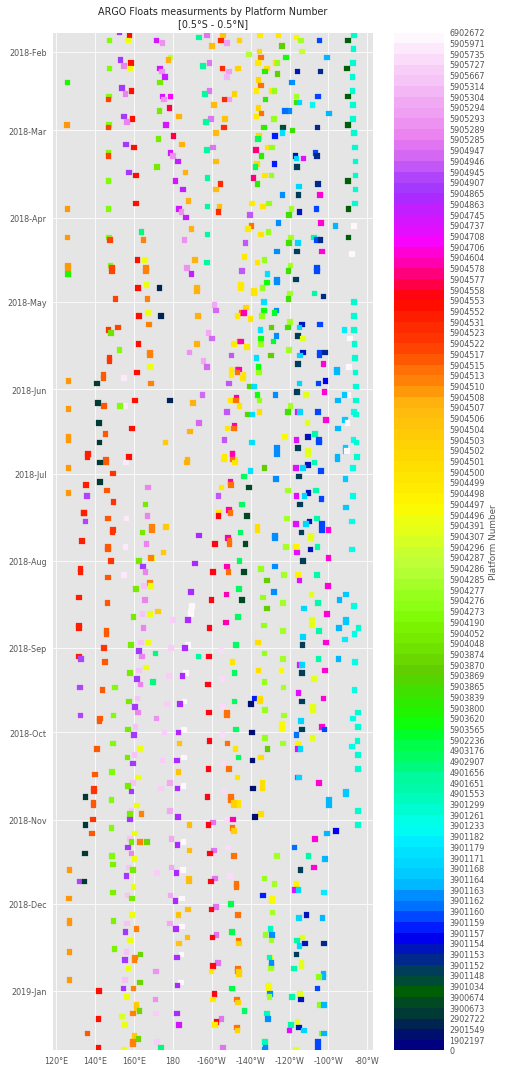

In [298]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl

plt.style.use('seaborn-paper')
yearsFmt = mdates.DateFormatter('%Y-%b')
monthFmt = mdates.MonthLocator

fig, ax = plt.subplots(1,1, figsize=(7,15))
cmap = plt.cm.gist_ncar
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

bounds = np.concatenate(([0],np.unique(dframe.prof_id.values)))
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
scat = plt.scatter(dframe.prof_lon.values,dframe.time.values,c=dframe.prof_id.values,marker='s', cmap=cmap,norm=norm)
cb = plt.colorbar(scat,ticks=bounds,boundaries=bounds)
cb.set_label('Platform Number')

ax.set_ylim(dframe.time.values.min(),dframe.time.values.max())
ax.invert_yaxis()

fig.canvas.draw()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = ['{}°E'.format(lab) if int(lab)<180 else '{}°W'.format(int(lab)-360) if int(lab)>180 else lab for lab in labels ]
ax.set_xticklabels(labels)
ax.yaxis.set_major_formatter(yearsFmt)

ax.set_title('ARGO Floats measurments by Platform Number\n[0.5°S - 0.5°N]')
fig.tight_layout()
fig.savefig('/home/grivera/ARGO/argo_byid.png',dpi=400)

In [265]:
dframe.prof_id

0       5904865
1       5904504
2       5904499
3       5904947
4       5904552
5       5904498
6       3901261
7       4901651
8       5904497
9       5904523
10      3901159
11      5904277
12      5904737
13      5904391
14      5904190
15      5904502
16      3900674
17      5905289
18      5905293
19      5904506
20      5903869
21      3901261
22      5904287
23      5904501
24      5904285
25      5904513
26      3901163
27      5903565
28      5904286
29      5904507
         ...   
971     5904307
972     5904553
973     5904498
974     5904737
975     4901553
976     5904391
977     5904513
978     3901153
979     5904708
980     5904502
981     3901168
982     5904515
983     5904273
984     3901163
985     5904503
986     5903870
987     3901159
988     5904496
989     5904510
990     5905667
991     3901299
992     5904510
993     3901162
994     4901656
995     5904947
996     5904552
997     3901159
998     5904391
999     3901162
1000    5904307
Name: prof_id, Length: 1

In [255]:
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = ['{}°E'.format(lab) if int(lab)<180 else '{}°W'.format(int(lab)-360) for lab in labels ]#ax.set_xticklabels(labels)
labels

['100°E',
 '125°E',
 '150°E',
 '175°E',
 '-160°W',
 '-135°W',
 '-110°W',
 '-85°W',
 '-60°W']

In [131]:
argo_data.JULD[0].data.astype('datetime64[D]')

numpy.datetime64('2019-01-01')

In [134]:
data = xr.DataArray(date,coords=[[argo_data.JULD[0].data.astype('datetime64[D]')],platf],dims=['time','prof_id'])
data

<xarray.DataArray (time: 1, prof_id: 6)>
array([[-119.78126,  172.864  , -155.757  , -124.885  ,  142.143  ,
        -132.555  ]])
Coordinates:
  * time     (time) datetime64[ns] 2019-01-01
  * prof_id  (prof_id) int64 3901160 4901656 5904947 5904938 5904552 5904276

In [139]:
data.name='prof_lon'
df = data.to_dataframe()
df

prof_lon
time       prof_id           
2019-01-01 3901160 -119.78126
           4901656  172.86400
           5904947 -155.75700
           5904938 -124.88500
           5904552  142.14300
           5904276 -132.55500

In [153]:
df2 = df.reset_index()
df2

,time,prof_id,prof_lon
0,2019-01-01,3901160,-119.78126
1,2019-01-01,4901656,172.86400
2,2019-01-01,5904947,-155.75700
3,2019-01-01,5904938,-124.88500
4,2019-01-01,5904552,142.14300
5,2019-01-01,5904276,-132.55500


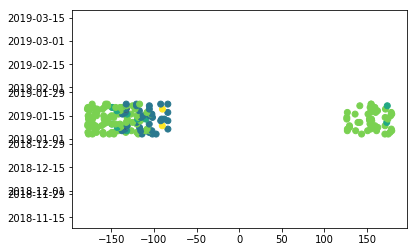

In [193]:
plt.scatter(dframe.prof_lon.values,dframe.time.values,c=dframe.prof_id.values)

In [168]:
df2.prof_id.values

array([3901160, 4901656, 5904947, 5904938, 5904552, 5904276])